In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:\Users\LENOVO\Desktop\sales_data_sample.csv', encoding='latin-1')
df.info()
df.isnull().sum()

df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df.drop(columns=['ADDRESSLINE2'], inplace=True, errors='ignore')
df['STATE'] = df['STATE'].fillna('unknown')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [21]:
df['STATE'] = df['STATE'].fillna('Unknown')
df['POSTALCODE'] = df['POSTALCODE'].fillna(0)
df['TERRITORY'] = df['TERRITORY'].fillna('Unknown')


In [22]:

print(df['STATE'].isnull().sum())        
print(df['POSTALCODE'].isnull().sum())   
print(df['TERRITORY'].isnull().sum())    


0
0
0


In [11]:
df.describe()
print("Mode of SALES:", df['SALES'].mode()[0])
print("Standard deviation of SALES:", df['SALES'].std())


Mode of SALES: 3003.0
Standard deviation of SALES: 1841.865105740182


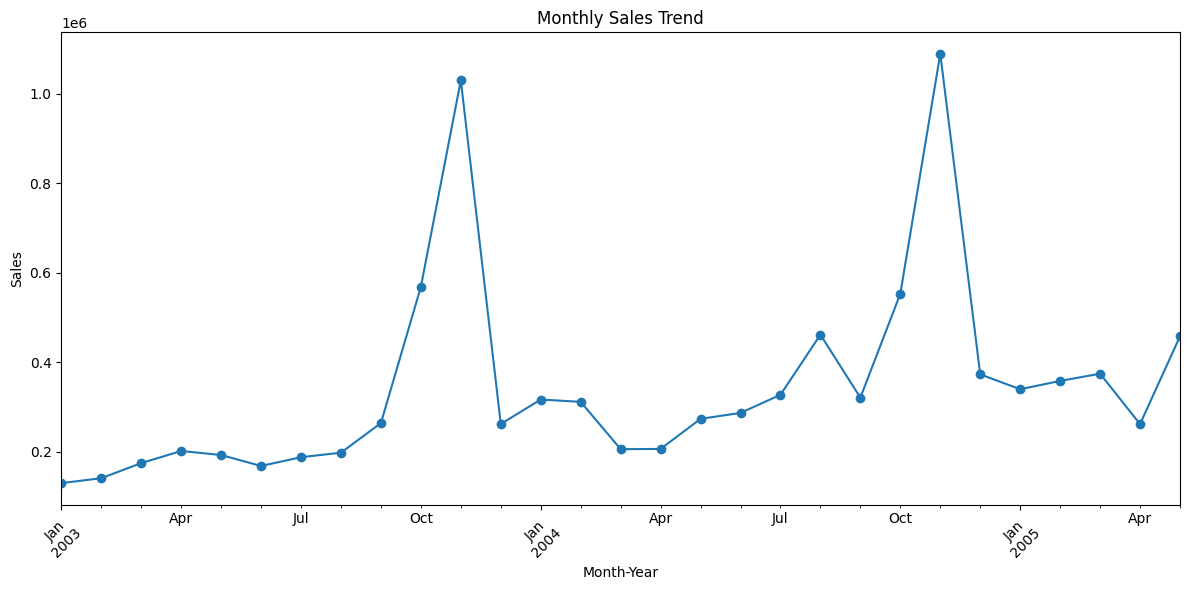

In [15]:
import matplotlib.pyplot as plt
df['Month_Year'] = df['ORDERDATE'].dt.to_period('M')
monthly_sales = df.groupby('Month_Year')['SALES'].sum()

# Plot monthly sales trend
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


CUSTOMERNAME
Euro Shopping Channel           912294.11
Mini Gifts Distributors Ltd.    654858.06
Australian Collectors, Co.      200995.41
Muscle Machine Inc              197736.94
La Rochelle Gifts               180124.90
Dragon Souveniers, Ltd.         172989.68
Land of Toys Inc.               164069.44
The Sharp Gifts Warehouse       160010.27
AV Stores, Co.                  157807.81
Anna's Decorations, Ltd         153996.13
Name: SALES, dtype: float64


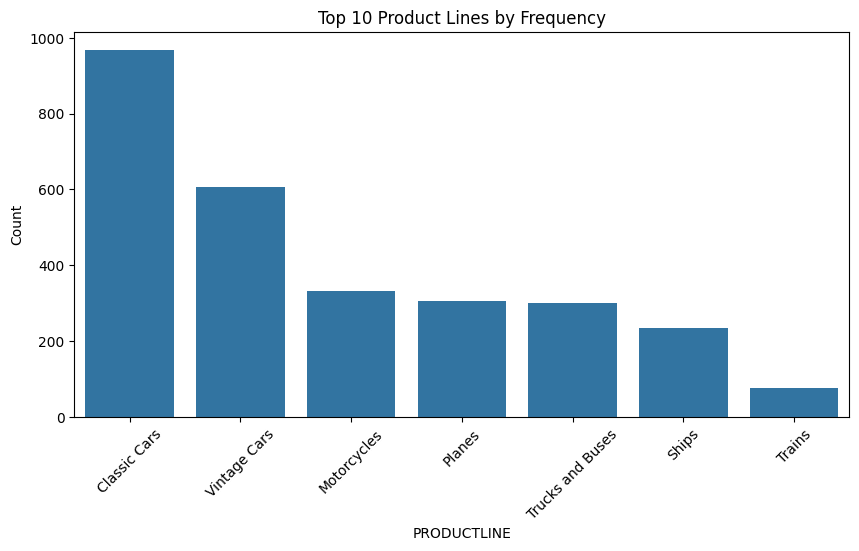

In [18]:
import seaborn as sns
top_customers = df.groupby('CUSTOMERNAME')['SALES'].sum().sort_values(ascending=False).head(10)
print(top_customers)

# Top 10 product lines
top_products = df['PRODUCTLINE'].value_counts().head(10)

# Plot top product lines
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title('Top 10 Product Lines by Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


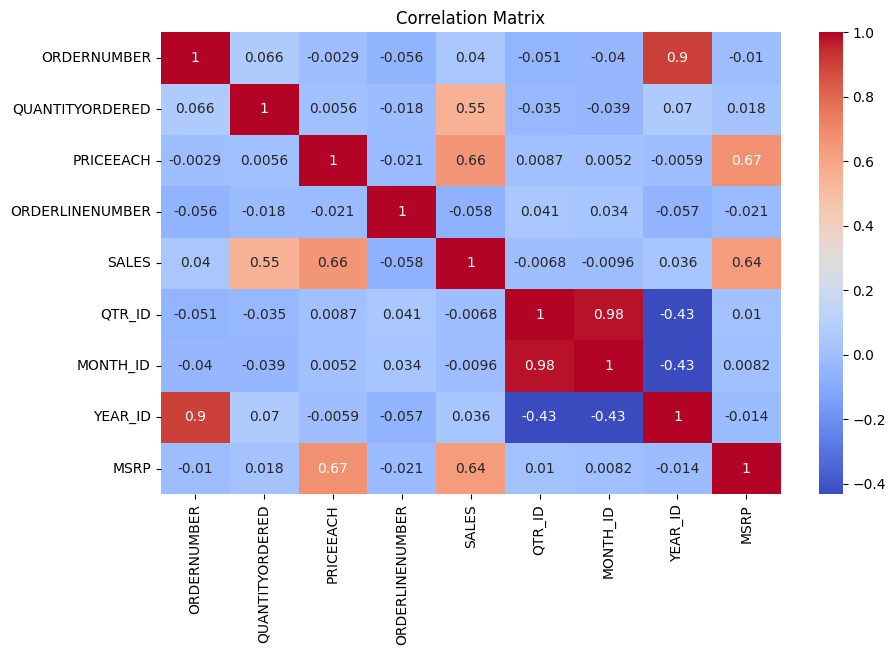

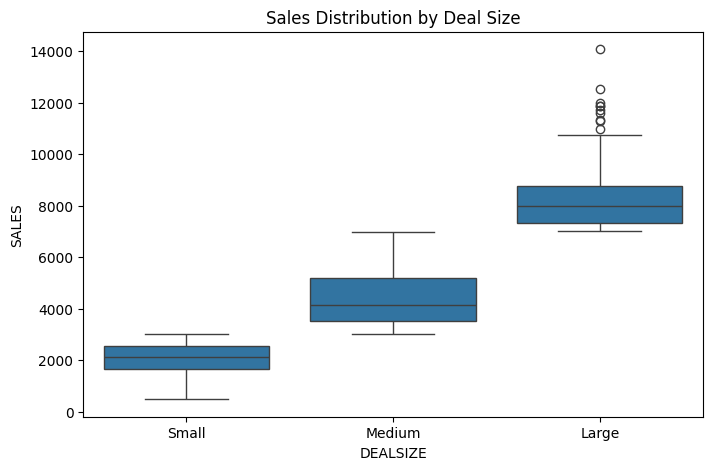

In [19]:
# Correlation heatmap for numerical values
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Boxplot of sales by deal size
plt.figure(figsize=(8, 5))
sns.boxplot(x='DEALSIZE', y='SALES', data=df)
plt.title('Sales Distribution by Deal Size')
plt.show()


### Recommendations:
- Focus on customers with high purchase history for loyalty campaigns.
- November shows peak sales — optimize inventory for Q4.
- Medium and Large deal sizes have higher median sales — target these more.
- Consider deeper analysis of PRODUCTLINE to forecast demand.
